# **Retrieve data from the CSV files** 
#### all tables concecated into one dataframe, calculate the mean per month and put it into one csv file called: mean_no2_monthlyvalues.csv


In [25]:
import pandas as pd
import numpy as np

urls = [
    'https://data.rivm.nl/data/luchtmeetnet/Vastgesteld-jaar/1990/', 
    'https://data.rivm.nl/data/luchtmeetnet/Vastgesteld-jaar/2016/',
    'https://data.rivm.nl/data/luchtmeetnet/Vastgesteld-jaar/2017/',
    'https://data.rivm.nl/data/luchtmeetnet/Vastgesteld-jaar/2018/',
    'https://data.rivm.nl/data/luchtmeetnet/Vastgesteld-jaar/2019/',
    'https://data.rivm.nl/data/luchtmeetnet/Vastgesteld-jaar/2020/',
    'https://data.rivm.nl/data/luchtmeetnet/Vastgesteld-jaar/2021/',
    'https://data.rivm.nl/data/luchtmeetnet/Vastgesteld-jaar/2022/',
    'https://data.rivm.nl/data/luchtmeetnet/Vastgesteld-jaar/2023/',
    'https://data.rivm.nl/data/luchtmeetnet/Vastgesteld-jaar/2024/',
]
csv_suffix = '_NO2.csv' 
all_dfs = [] 


for base_url in urls:
    
    year = base_url.split('/')[-2]
    file_name = year + csv_suffix
    full_url = base_url + file_name 
    
   
    temp_df = pd.read_csv(
        full_url, 
        sep=';', 
        skiprows=5 
    )
    
    all_dfs.append(temp_df)
    print(f"loaded: {file_name}")

#Combine data into one df
main_df = pd.concat(all_dfs, ignore_index=True)

print(f"Total instances: {len(main_df)}")


loaded: 1990_NO2.csv
loaded: 2016_NO2.csv
loaded: 2017_NO2.csv
loaded: 2018_NO2.csv
loaded: 2019_NO2.csv
loaded: 2020_NO2.csv
loaded: 2021_NO2.csv
loaded: 2022_NO2.csv
loaded: 2023_NO2.csv
loaded: 2024_NO2.csv
Total instances: 6666197


In [ ]:
# Convert date columns to datetime format
main_df['begindatumtijd'] = pd.to_datetime(main_df['begindatumtijd'])

# Add a new column for year and month 
main_df['Jaar_Maand'] = main_df['begindatumtijd'].dt.to_period('M')

# Group by the new column and calculate the mean of 'waarde'
maandelijks_gemiddelde_df = main_df.groupby('Jaar_Maand')['waarde'].mean().reset_index()

# Rename columns 
maandelijks_gemiddelde_df.columns = ['Year_Month', 'Average NO2 Value']

# Format the columns
maandelijks_gemiddelde_df['Year_Month'] = maandelijks_gemiddelde_df['Year_Month'].astype(str)
maandelijks_gemiddelde_df['Average NO2 Value'] = maandelijks_gemiddelde_df['Average NO2 Value'].round(0).astype(int)

output_filename = 'mean_no2_monthlyvalues.csv'
maandelijks_gemiddelde_df.to_csv(output_filename, index=False, sep=',')


C:\Users\enock\AppData\Local\Temp\ipykernel_2632\1758849496.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  main_df['Jaar_Maand'] = main_df['begindatumtijd'].dt.to_period('M')


    Year_Month  Average NO2 Value
0      1990-01            37.0000
1      1990-02            34.0000
2      1990-03            38.0000
3      1990-04            35.0000
4      1990-05            38.0000
5      1990-06            34.0000
6      1990-07            30.0000
7      1990-08            40.0000
8      1990-09            35.0000
9      1990-10            43.0000
10     1990-11            42.0000
11     1990-12            38.0000
12     2016-01            30.0000
13     2016-02            27.0000
14     2016-03            25.0000
15     2016-04            22.0000
16     2016-05            20.0000
17     2016-06            18.0000
18     2016-07            17.0000
19     2016-08            19.0000
20     2016-09            27.0000
21     2016-10            25.0000
22     2016-11            31.0000
23     2016-12            37.0000
24     2017-01            37.0000
25     2017-02            29.0000
26     2017-03            29.0000
27     2017-04            21.0000
28     2017-05

# The nature and structure of the dataset. 
#### source: https://data.rivm.nl/data/luchtmeetnet/readme.pdf

#### Format of the data:
- The data is Time-Series. It consists of sequential measurements of NO₂ concentration taken at specific dates and times across multiple monitoring stations in the Netherlands.

#### Number of instances:
- The exact number will be determined by code output (len(main_df)). Total amount of records in the combined csv dataset (len(df)): 6.666.197. This amount is excluding the headers in the first 5 rows of every dataset


#### Representativity and bias:
- The data is representative of all measuring statements in the netherlands at all times. Different monitoring networks have been used in order to gather the NO2 values.

#### Data structure:
- The data structure is Tabular. It is also relational in that each measurement belongs to a specific date, time, and location.


In [ ]:
import pandas as pd

data_dict = {
    'Variable Name': [
        'meetreeks',              
        'meetlocatie',            
        'bron_id',                
        'accredidatie',           
        'componenten',            
        'matrix',                 
        'meetopstelling_id',      
        'eenheid',                
        'begindatum',             
        'einddatum',              
        'waarde',                 
        'opm_code'                
    ],
    'Description or Meaning': [
        'identifier for the measurement series. ', 
        'identifier for the sampling location.', 
        'identifier for the source (i.e., the monitoring network)', 
        'accreditation number under which the measurements are carried out by a measuring network.', 
        'pollutant shorthand name, also used as an identifier. ', 
        'the environment which contains the pollutant. ', 
        'identifier for the measuring setup (i.e., the used measurement equipment)', 
        'the measurement duration of the measurements. ', 
        'start date time of the measurement.', 
        'end date time of the measurement.', 
        'measurement value', 
        'identifier for remarks.'
    ],
    'Data Type': [
        'string', 
        'string', 
        'string', 
        'string', 
        'string', 
        'string', 
        'string', 
        'string', 
        'string', 
        'string', 
        'Float64', 
        'string'
    ],
    'Units or Scale': [
        'N/A', 
        'N/A', 
        'N/A', 
        'N/A', 
        'N/A', 
        'N/A', 
        'N/A', 
        'N/A', 
        'YYYY-MM-DD HH:MM:SS', 
        'YYYY-MM-DD HH:MM:SS', 
        'micrograms per cubic meter', 
        'N/A'
    ],
    'Encoding': [
        'N/A', 
        'N/A', 
        'N/A', 
        'N/A', 
        'N/A', 
        'N/A', 
        'N/A', 
        'N/A', 
        'N/A', 
        'N/A', 
        'Int', 
        'N/A'
    ]
}

data_dictionary_df = pd.DataFrame(data_dict)
data_dictionary_df = data_dictionary_df.set_index('Variable Name')

data_dictionary_df

,Description or Meaning,Data Type,Units or Scale,Encoding
Variable Name,,,,
meetreeks,unique identifier for the measurement series.,string,N/A,N/A
meetlocatie,unique identifier for the sampling location.,string,N/A,N/A
bron_id,"unique identifier for the source (i.e., the mo...",string,N/A,N/A
accredidatie,accreditation number under which the measureme...,string,N/A,N/A
componenten,"pollutant shorthand name, also used as an iden...",string,N/A,N/A
matrix,the environment which contains the pollutant.,string,N/A,N/A
meetopstelling_id,unique identifier for the measuring setup (i.e...,string,N/A,N/A
eenheid,the measurement duration of the measurements.,string,N/A,N/A
begindatum,start date time of the measurement.,string,YYYY-MM-DD HH:MM:SS,N/A


## potential data quality problems


In [ ]:
import pandas as pd

# Stel Pandas display-opties in om alle kolommen en rijen in de output te zien
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)


# no scientific notation
pd.set_option('display.float_format', '{:.0f}'.format)

print(main_df.describe(include='all'))
print(main_df[['waarde']].describe())

nan_count = main_df.isnull().sum()
total_rows = len(main_df)
missing_data = nan_count[nan_count > 0]
missing_data = missing_data.sort_values(ascending=False)

if 'waarde' in missing_data.index:
    waarde_missing_info = missing_data.loc[['waarde']]
    print(waarde_missing_info)
else:
    print("There are no NAN values in the 'waarde' column.")

             meetreeks_id meetlocatie_id  bron_id accreditatienummer component   matrix      meetopstelling_id meetduur  eenheid                       begindatumtijd              einddatumtijd  waarde  opm_code
count             6666197        6666197  6666197            6666197   6666197  6666197                6666197  6666197  6666197                              6666197                    6666197 6666197         0
unique                114            114        7                  4         1        1                      6        1        1                                  NaN                      87672     NaN       NaN
top     NL10418_NO2_lucht        NL10418      LML               L224       NO2    lucht  chemoluminesc_API200E      uur    µg/m³                                  NaN  2016-01-04T19:00:00+01:00     NaN       NaN
freq                86826          86826  3817185            3469181   6666197  6666197                3933487  6666197  6666197                            

In [20]:
main_df.info()

#description of df
print(main_df[['waarde']].describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6666197 entries, 0 to 6666196
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   meetreeks_id        object 
 1   meetlocatie_id      object 
 2   bron_id             object 
 3   accreditatienummer  object 
 4   component           object 
 5   matrix              object 
 6   meetopstelling_id   object 
 7   meetduur            object 
 8   eenheid             object 
 9   begindatumtijd      object 
 10  einddatumtijd       object 
 11  waarde              float64
 12  opm_code            float64
 13  waarde_log          float64
dtypes: float64(3), object(11)
memory usage: 712.0+ MB
             waarde
count  6.655289e+06
mean   2.100621e+01
std    1.710396e+01
min    1.000000e-02
25%    8.590000e+00
50%    1.600000e+01
75%    2.870000e+01
max    4.350000e+02


# Analyse the distribution for all variables

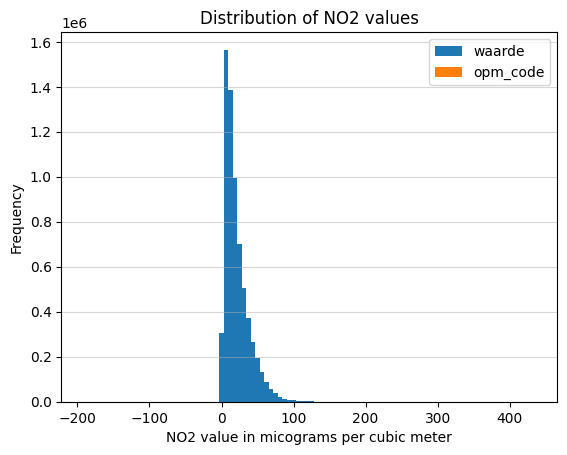

In [ ]:
import pandas as pd
import numpy as np
ax= main_df.plot(
    kind='hist', 
    bins=100, 
    title='Distribution of NO2 values'
)

plt.ylabel("Frequency") 
plt.xlabel("NO2 value in micograms per cubic meter")

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

main_df.sort_values(by='begindatumtijd', inplace=True)

plt.figure(figsize=(14, 7))

plt.plot(
    main_df['begindatumtijd'], 
    main_df['waarde']
)

plt.xlabel('Begindatumtijd (Jaar)')
plt.ylabel('NO2 value (µg/m³)')
plt.title('Time Series: NO2 value')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

## Duplicate instances 

In [16]:
import pandas as pd
duplicate_count = main_df.duplicated().sum()

if duplicate_count > 0:
    print(f"Found {duplicate_count} instances")
else:
    print("No duplicate instances found.")

No duplicate instances found.


## Outliers
In the beginning of the notebook, a preview of a potential data quality problem was shown. For this project, it is
advised not to remove them

In [58]:
import pandas as pd

pd.set_option('display.float_format', '{:.4f}'.format)
print(main_df[['waarde']].describe())


            waarde
count 6666197.0000
mean       20.9694
std        17.1157
min      -191.0000
25%         8.5400
50%        16.0000
75%        28.7000
max       435.0000


In [61]:
import pandas as pd
import numpy as np

#minimum value
min_waarde = main_df['waarde'].min()
min_waarde_frequentie = (main_df['waarde'] == min_waarde).sum()

#maximum value
max_waarde = main_df['waarde'].max()
max_waarde_frequentie = (main_df['waarde'] == max_waarde).sum()

#values less than or equal to 0  
nonpositive_values = (main_df['waarde'] < 1).sum()


#minimum and frequencency
print(f"Minimum value in dataset: {min_waarde:.0f}")
print(f"Frequency minimum value: {min_waarde_frequentie}")

#maximum and frequencency
print(f"Maximum value in dataset: {max_waarde:.0f}")
print(f"Frequency of maximum value: {max_waarde_frequentie}")

#non_positive values
print(f"Frequency of No2 values below  or equal to 0: {nonpositive_values}")

Minimum value in dataset: -191
Frequency minimum value: 1
Maximum value in dataset: 435
Frequency of maximum value: 1
Frequency of No2 values below  or equal to 0: 32369


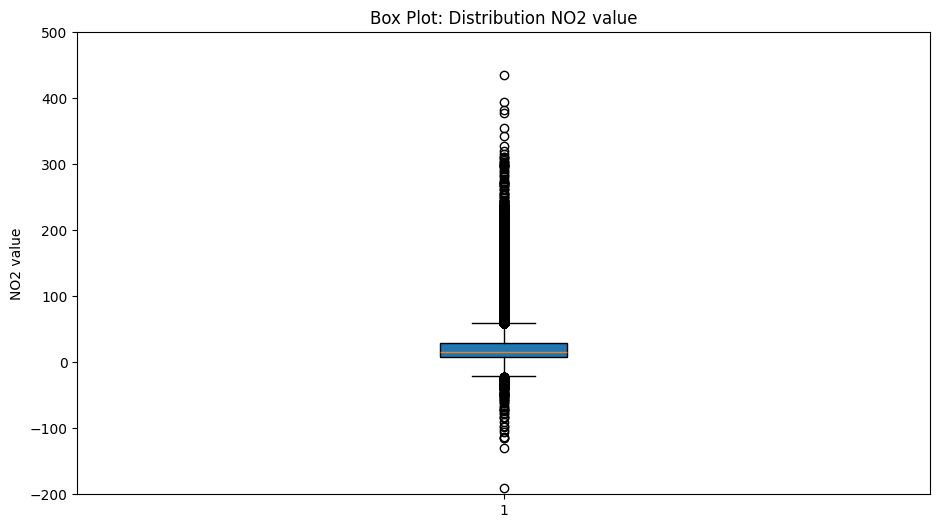

In [127]:
import matplotlib.pyplot as plt


plt.figure(figsize=(11, 6))
plt.boxplot(
    main_df['waarde'], 
    vert=True, 
    patch_artist=True
)

plt.ylim(-200, 500)

plt.title("Box Plot: Distribution NO2 value")
plt.ylabel("NO2 value")
plt.show()

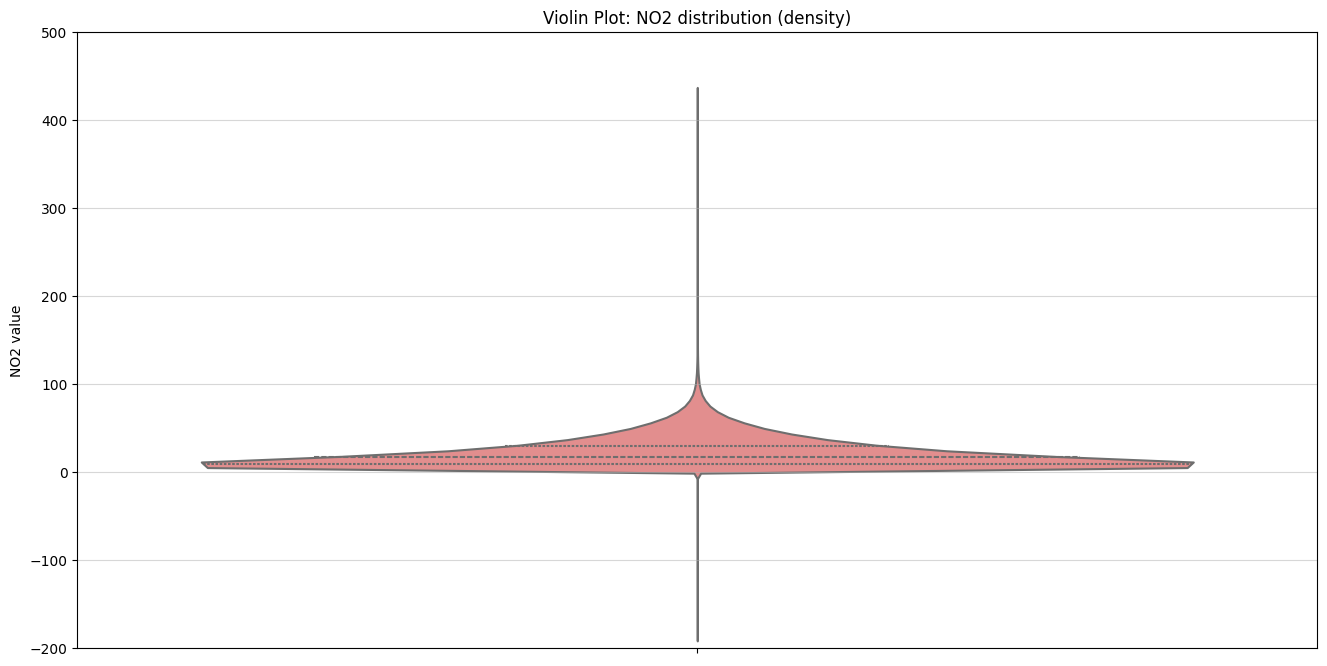

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 8))

sns.violinplot(
    y=main_df['waarde'],
    inner='quartile', 
    color='lightcoral',
    linewidth=1.5
)

plt.ylim(-200, 500) 

plt.title("Violin Plot: NO2 distribution (density)")
plt.ylabel("NO2 value")
plt.grid(True, axis='y', alpha=0.5)
plt.show()

## Seaborn visualizations

In [60]:
!pip install seaborn



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\enock\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


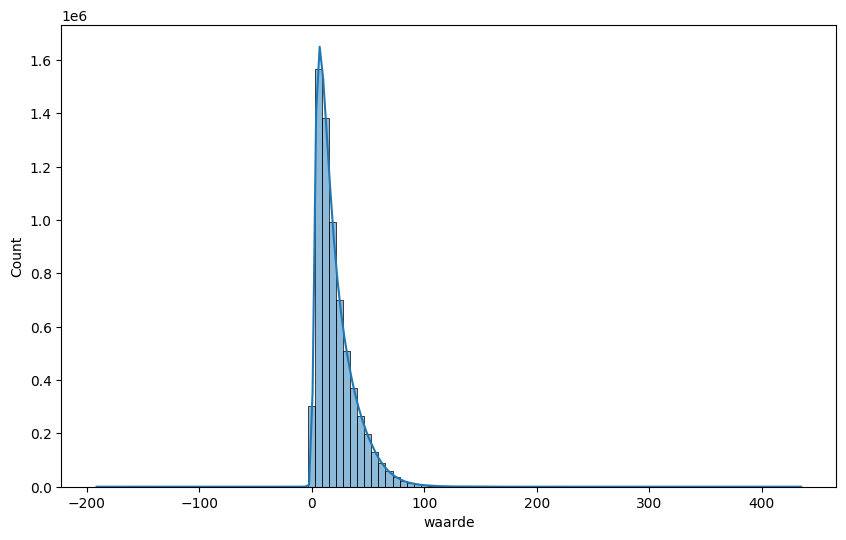

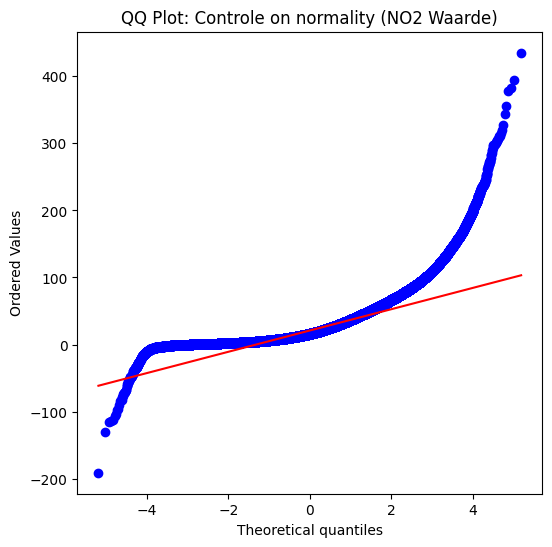

In [27]:
import scipy.stats as stats
import seaborn as sns 

plt.figure(figsize=(10, 6))
sns.histplot(
    main_df['waarde'], 
    bins=100, 
    kde=True
)
plt.figure(figsize=(6, 6))
stats.probplot(
    main_df['waarde'], 
    dist="norm", 
    plot=plt
)

plt.title("QQ Plot: Controle on normality (NO2 Waarde)")
plt.show()

In [28]:
print(main_df['waarde'].skew())


1.7106930659101702


## Distribtuion of the 0 and negative values according to meetset_id

In [ ]:
import pandas as pd

non_positive_df = main_df[main_df['waarde'] <= 0]

if non_positive_df.empty:
    print("No values found that are 0 or less.")
else:
    # returns a series
    error_counts = non_positive_df['meetreeks_id'].value_counts()
    
    # convert series to dataFrame
    error_table_df = error_counts.reset_index()
    
    print(error_table_df)

          meetreeks_id  count
0    NL10918_NO2_lucht   1112
1    NL10934_NO2_lucht   1059
2    NL10538_NO2_lucht    792
3    NL10301_NO2_lucht    684
4    NL01913_NO2_lucht    537
5    NL01496_NO2_lucht    505
6    NL10631_NO2_lucht    410
7    NL10540_NO2_lucht    326
8    NL49553_NO2_lucht    317
9    NL49003_NO2_lucht    270
10   NL10807_NO2_lucht    252
11   NL10637_NO2_lucht    249
12   NL01497_NO2_lucht    238
13   NL10318_NO2_lucht    204
14   NL49022_NO2_lucht    187
15   NL10928_NO2_lucht    179
16   NL01488_NO2_lucht    172
17   NL10903_NO2_lucht    149
18   NL10444_NO2_lucht    139
19   NL01485_NO2_lucht    129
20   NL10520_NO2_lucht    126
21   NL10722_NO2_lucht    125
22   NL10513_NO2_lucht    121
23   NL10437_NO2_lucht    119
24   NL50002_NO2_lucht    119
25   NL10938_NO2_lucht    107
26   NL49703_NO2_lucht    106
27   NL01494_NO2_lucht    104
28   NL10636_NO2_lucht    100
29   NL49680_NO2_lucht     95
30   NL10704_NO2_lucht     89
31   NL10236_NO2_lucht     87
32   NL106

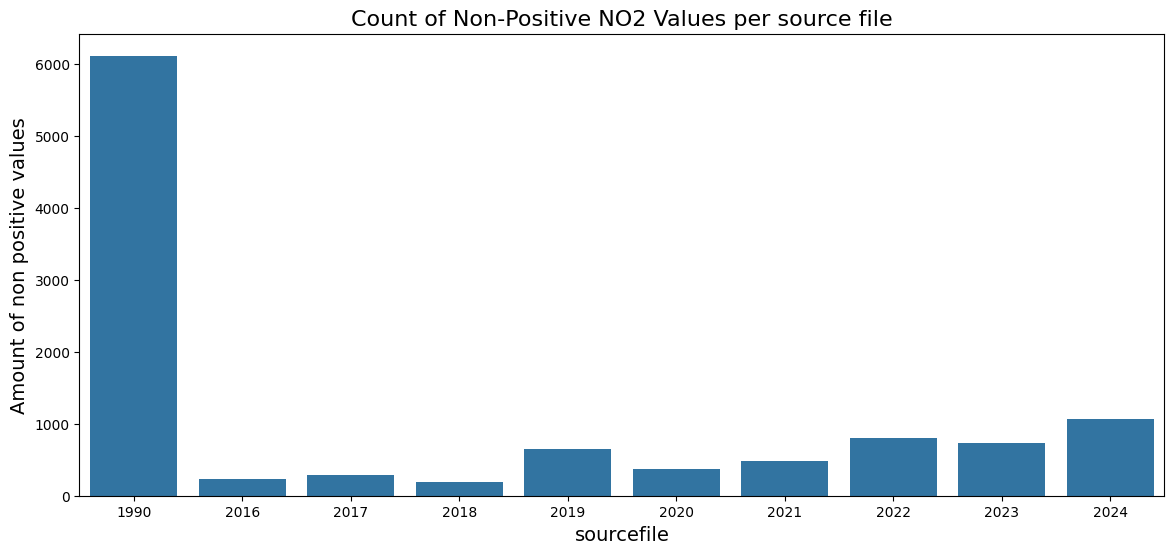

In [57]:
import seaborn as sns

non_positive_df = main_df[main_df['waarde'] <= 0]

if non_positive_df.empty:
    print("No non positive values found. Bar chart cannot be created.")
else:
    # extract year from 'begindatumtijd' column
    nonpositive_years = non_positive_df['begindatumtijd'].dt.year

    # count errors per year
    fouten_per_jaar = nonpositive_years.value_counts()
    
    #make a dataframe for seaborn
    plot_df = fouten_per_jaar.reset_index(name='non positive values')
    plot_df.columns = ['year', 'non positive values']
    
    plt.figure(figsize=(14, 6))
    sns.barplot(
        x='year', 
        y='non positive values', 
        data=plot_df)
    plt.title('Count of Non-Positive NO2 Values per source file', fontsize=16)
    plt.xlabel('sourcefile', fontsize=14)
    plt.ylabel('Amount of non positive values', fontsize=14)
    plt.show()

### Cleaning Requirement: All values ≤0 must be imputed to positive values, using either fillna or em algorithm.


EM-algorithm:

https://kushalmukherjee.medium.com/missing-value-treatment-using-em-a-comparative-study-e4b0d6c9da61

https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python

https://www.geeksforgeeks.org/machine-learning/ml-expectation-maximization-algorithm/

In [ ]:
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 


# Put the single feature into a DataFrame required by IterativeImputer
df = pd.DataFrame({'waarde_log': log_waarde_array})

print("Original Data (Single Feature):")
print(df)

# Initialize the IterativeImputer.
# Since there is only one feature, it will fall back to using the mean/median
# of that single feature across its iterations.
imputer = IterativeImputer(max_iter=10, random_state=0)

# Perform imputation: fit_transform requires a 2D array, which the DataFrame provides.
imputed_data = imputer.fit_transform(df)

# Create a new DataFrame with the imputed data
# The output is a NumPy array, so column names must be reapplied.
df_imputed = pd.DataFrame(imputed_data, columns=df.columns)

print("\nImputed Data (Single Feature):")
print(df_imputed.round(4))

Original Data (Single Feature):
   waarde_log
0         2.1
1         NaN
2         3.5
3         4.1
4         NaN
5         1.5
6         2.7
7         NaN
8         3.0

Imputed Data (Single Feature):
   waarde_log
0      2.1000
1      2.8167
2      3.5000
3      4.1000
4      2.8167
5      1.5000
6      2.7000
7      2.8167
8      3.0000


Fillna: https://www.youtube.com/watch?v=EaGbS7eWSs0

In [63]:
import numpy as np 
import pandas as pd 

count_non_positive = (main_df['waarde'] <= 0).sum()

if count_non_positive > 0: 
    #Assign NaN to non positive values
    initial_total_nans = main_df['waarde'].isnull().sum()
    main_df.loc[main_df['waarde'] <= 0, 'waarde'] = np.nan 

    #impute the NAN values with positive values from the previous record with the same meetreeks_id
    main_df['waarde'] = main_df.groupby('meetreeks_id')['waarde'].fillna(method='ffill')
    
    #calculate how many NaNs were filled during the imputation step
    final_total_nans = main_df['waarde'].isnull().sum()
    nans_filled = initial_total_nans + count_non_positive - final_total_nans
    
    print(f" filled {nans_filled} non-positive values.") 
    
print(f"Rows: {len(main_df)}") 
print(f"Final NaN values in 'waarde': {main_df['waarde'].isnull().sum()}") 
print(main_df['waarde'].head())

C:\Users\enock\AppData\Local\Temp\ipykernel_26484\2979141869.py:12: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  main_df['waarde'] = main_df.groupby('meetreeks_id')['waarde'].fillna(method='ffill')
C:\Users\enock\AppData\Local\Temp\ipykernel_26484\2979141869.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  main_df['waarde'] = main_df.groupby('meetreeks_id')['waarde'].fillna(method='ffill')


 filled 10908 non-positive values.
Rows: 6666197
Final NaN values in 'waarde': 0
0   34
1   32
2   34
3   33
4   52
Name: waarde, dtype: float64


In [3]:
a = main_df['waarde']
c = abs(a.min())

In [4]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt



shift = a + c + 0.001
log_x = np.log(shift)  
print(log_x)

0          3.526684
1          3.466080
2          3.526684
3          3.496841
4          3.951455
             ...   
6666192    3.266179
6666193    3.157468
6666194    3.127243
6666195    3.170148
6666196    3.109552
Name: waarde, Length: 6666197, dtype: float64


In [5]:
log_x.skew()


np.float64(-0.47070017567205225)

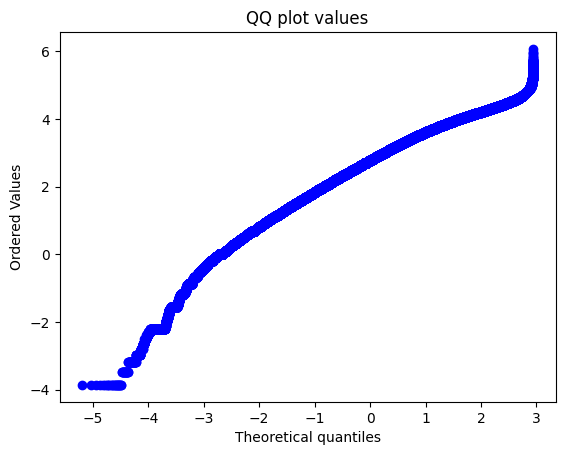

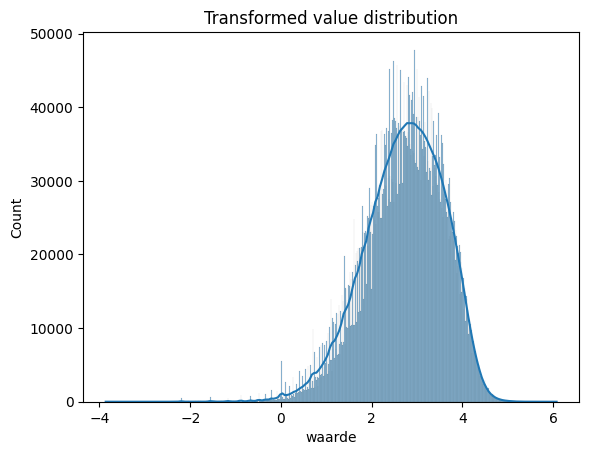

In [9]:
stats.probplot(log_x, dist="norm", plot=plt)
plt.title("QQ plot values")
plt.show()

sns.histplot(log_x,kde=True)
plt.title("Transformed value distribution")
plt.show()

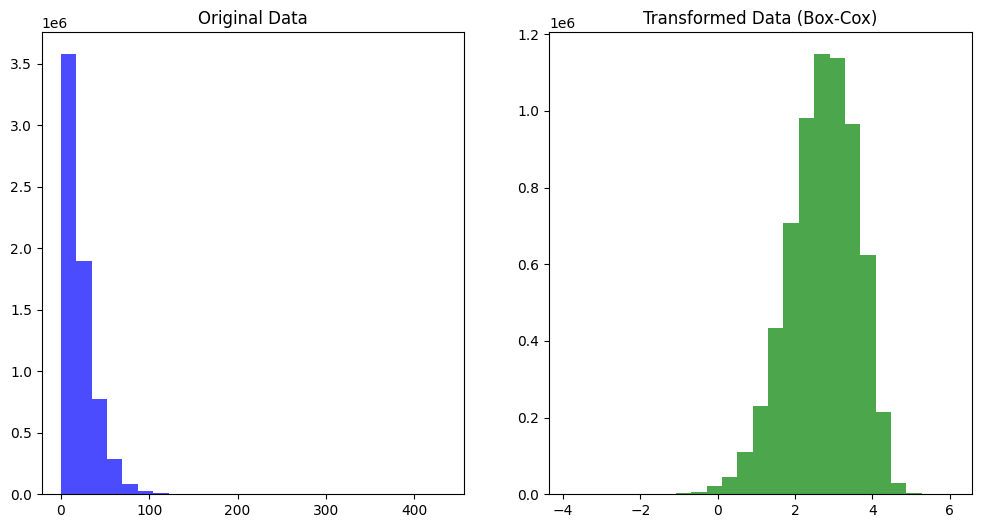

In [7]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(a, bins=25, color='blue', alpha=0.7)
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.hist(log_x, bins=25, color='green', alpha=0.7)
plt.title('Transformed Data (Box-Cox)')

plt.show()

## Cleaning encoding problems, duplicate or redundant variables/instances and assigning substitute values to negative NO2 values ##